 # Check current working directory

In [1]:
!pwd
print()
!ls
print()
!cat cryspy.in

/Users/yamashita06/work/cryspy/interactive

EA-vc_binary_cryspy.in   RS_cryspy.in             cryspy_interactive.ipynb
EA-vc_ternary_cryspy.in  backup                   readme
EA_cryspy.in             cryspy.in                trash

[basic]
algo = EA-vc
calc_code = ASE
nstage = 1
njob = 10
jobcmd = zsh
jobfile = job_cryspy

[structure]
atype = Cu Au
ll_nat = 0 0
ul_nat = 8 8

[ASE]
ase_python = ase_in.py

[EA]
n_pop = 20
n_crsov = 5
n_perm = 2
n_strain = 2
n_rand = 2
n_add = 3
n_elim = 3
n_subs = 3
target = random
n_elite = 2
n_fittest = 10
slct_func = TNM
t_size = 2
maxgen_ea = 5
end_point = 0.0 0.0

[option]



# To ignore warnings
if you want to ignore warnings, comment out the following lines

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

# Import

In [3]:
# ---------- import
from cryspy.interactive import action

# Backup and clean

Backup  
[CrySPY Document > CrySPY > Features > Backup](https://tomoki-yamashita.github.io/CrySPY_doc/features/backup/index.html)

In [ ]:
# ---------- backup
#action.backup()

Clean  
[CrySPY Document > CrySPY > Features > Clean](https://tomoki-yamashita.github.io/CrySPY_doc/features/clean/index.html)

After running action.clean(), make sure to restart the kernel.
Otherwise, log files will no longer be output.

In [9]:
# ---------- clean
#action.clean(skip_yes=False)

# Initialize CrySPY

In [4]:
# ---------- initial structure generation
action.initialize()

[2025-02-07 13:43:45,316][cryspy_init][INFO] 


Start CrySPY 1.4.0b10


[2025-02-07 13:43:45,317][cryspy_init][INFO] # ---------- Library version info
[2025-02-07 13:43:45,317][cryspy_init][INFO] pandas version: 2.2.2
[2025-02-07 13:43:45,319][cryspy_init][INFO] pymatgen version: 2025.1.24
[2025-02-07 13:43:45,320][cryspy_init][INFO] pyxtal version: 1.0.6
[2025-02-07 13:43:45,320][cryspy_init][INFO] # ---------- Read input file, cryspy.in
[2025-02-07 13:43:45,322][write_input][INFO] [basic]
[2025-02-07 13:43:45,322][write_input][INFO] algo = EA-vc
[2025-02-07 13:43:45,322][write_input][INFO] calc_code = ASE
[2025-02-07 13:43:45,323][write_input][INFO] nstage = 1
[2025-02-07 13:43:45,323][write_input][INFO] njob = 10
[2025-02-07 13:43:45,324][write_input][INFO] jobcmd = zsh
[2025-02-07 13:43:45,325][write_input][INFO] jobfile = job_cryspy
[2025-02-07 13:43:45,325][write_input][INFO] 
[2025-02-07 13:43:45,326][write_input][INFO] [structure]
[2025-02-07 13:43:45,326][write_input][INFO] st

In [ ]:
!ls

# Set calculator
You can use ASE calculator

In [5]:
# ---------- EMT in ASE
from ase.calculators.emt import EMT
calculator = EMT()

# ---------- CHGNet
#from chgnet.model import CHGNetCalculator
#calculator = CHGNetCalculator()

# Restart CrySPY
Structure optimization with ASE. After generating the structures, repeating the execution of this cell will progress the structure optimization.

 In Jupyter, SystemExit sometimes appears as an exception and may look like an error, but it is normal behavior.

In [8]:
# ---------- structure optimization
action.restart(
    njob=20,    # njob=0: njob in cryspy.in will be used
    calculator=calculator,
    optimizer='FIRE',    # 'FIRE', 'BFGS' or 'LBFGS'
    symmetry=True,       # default: True
    fmax=0.01,           # default: 0.01
    steps=2000,          # default: 2000
)

[2025-02-07 13:50:28,040][cryspy_restart][INFO] 


Restart CrySPY 1.4.0b10


[2025-02-07 13:50:28,042][cryspy_restart][INFO] read input, cryspy.in


  0%|          | 0/20 [00:00<?, ?it/s]

[2025-02-07 13:50:43,857][ctrl_job][INFO] Done generation 2
[2025-02-07 13:50:43,858][ctrl_job][INFO] Calculate convex hull for generation 2
[2025-02-07 13:50:43,986][ctrl_job][INFO] 
EA is ready


SystemExit: 

# Show results

In [9]:
# ---------- show results
#!cat ./data/cryspy_rslt    # Order of structure optimization completion
!cat ./data/cryspy_rslt_energy_asc    # show energy ascending order
#!sed -n 2,4p ./data/cryspy_rslt    # show i--jth lines
#!tail -n 5 ./data/cryspy_rslt    # show last 5 lines

    Gen  Spg_num   Spg_sym  Spg_num_opt Spg_sym_opt  E_eV_atom  Ef_eV_atom Num_atom  Magmom   Opt
26    2       65      Cmmm          123      P4/mmm  -0.011424   -0.011424   (2, 2)     NaN  done
1     1       26    Pmc2_1          123      P4/mmm  -0.011401   -0.011401   (2, 2)     NaN  done
31    2        1        P1          225       Fm-3m  -0.007033   -0.007033   (5, 0)     NaN  done
28    2        2       P-1          225       Fm-3m  -0.007032   -0.007032   (2, 0)     NaN  done
14    1        1        P1          225       Fm-3m  -0.007028   -0.007028   (4, 0)     NaN  done
24    2        1        P1          225       Fm-3m  -0.007027   -0.007027   (4, 0)     NaN  done
21    2        1        P1          225       Fm-3m  -0.007010   -0.007010   (5, 0)     NaN  done
36    2       47      Pmmm           47        Pmmm  -0.001799   -0.001799   (3, 1)     NaN  done
29    2        1        P1           12        C2/m   0.001499    0.001499   (4, 6)     NaN  done
30    2        1    

# Structure visualization

In [10]:
from ase.visualize import view
atoms = action.get_atoms('opt', cid=0)    # 'init' or 'opt'
view(atoms, viewer='ngl')    # viewer = 'ngl', 'ase', or 'x3d'

# Energy plot for RS, EA
Cannot be used for variable compositions (EA-vc).

Number of generation: 2
Number of data: 40
Success: 40
Error: 0
Emin: -0.011424028800693264 eV/atom


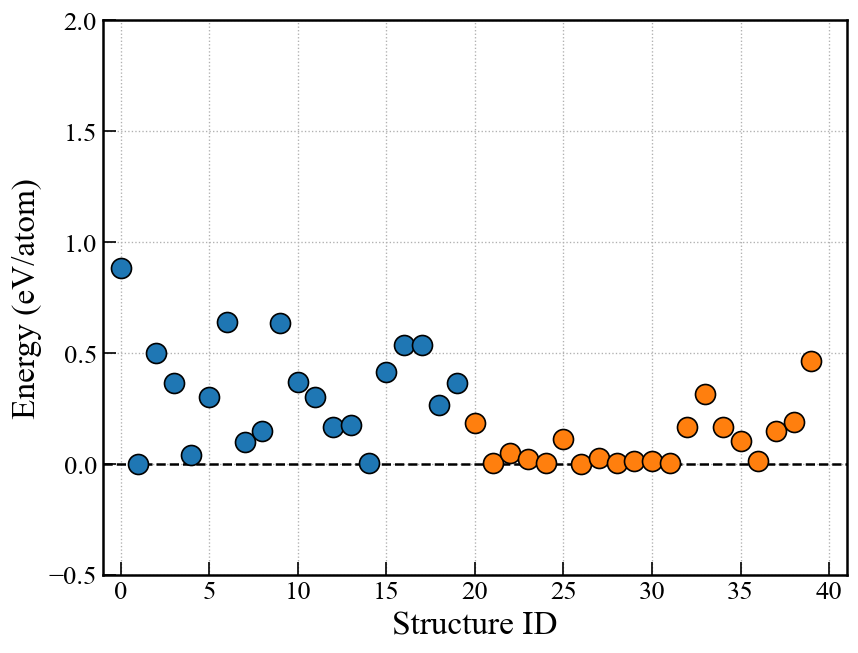

In [11]:
#プロット
fig, ax = action.plot_E(
              title=None,
              ymax=2.0,
              ymin=-0.5,
              markersize=12,
              marker_edge_width=1.0,
              marker_edge_color='black',
              alpha=1.0,
          )

# Convex hull plot for EA-vc
## Interactive plot using Plotly

- cgen: Which generation’s data to plot up to. If None, data will be plotted up to the latest generation.
- show_unstable: The maximum hull distance value to display on the plot
- ternary_style  
  - Binary system: ternary_style = '2d'
  - Ternary system: ternary_style = '2d', '3d'
  - Quaternary system: ternary_style = '3d'

In [12]:
action.interactive_plot_convex_hull(cgen=None, show_unstable=0.2, ternary_style='2d')

## Binary system, matplotlib
This is only for binary systems.

- cgen: Which generation’s data to plot up to. If None, data will be plotted up to the latest generation.
- show_max: The maximum formation energy to display on the plot
- label_stable: Whether to display the labels (compositions) of stable structures
- vmax: The maximum hull distance in the color bar
- bottom_margin: Bottom margin of y-axis

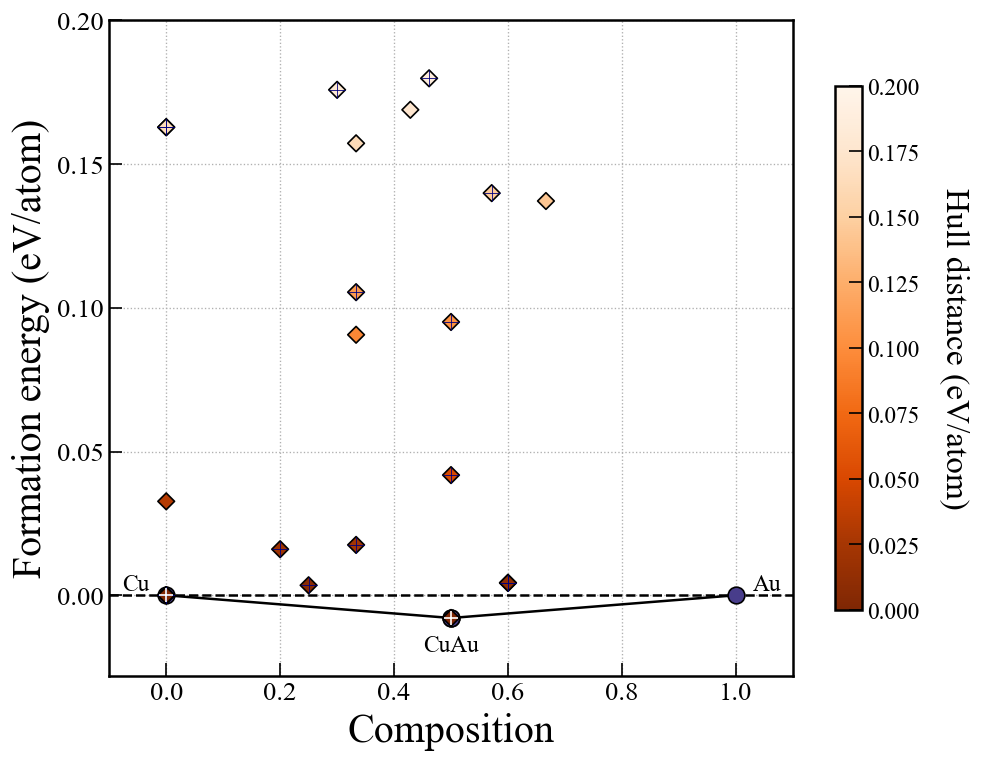

In [13]:
fig, ax = action.plot_convex_hull_binary(
              cgen=None,
              show_max=0.2,
              label_stable=True,
              vmax=0.2,
              bottom_margin=0.02,
          )
fig    # to show plot in jupyter

## Ternary system, matplotlib
This is only for ternary systems.

- show_max: The maximum hull distance value to display on the plot
- label_stable: Whether to display the labels (compositions) of stable structures
- vmax: The maximum value of the color bar


In [ ]:
fig, ax = action.plot_convex_hull_ternary(
              cgen=None,
              show_max=0.2,
              label_stable=True,
              vmax=0.2,
          )
fig    # to show plot in jupyter